HOUSE PRICE PREDICTION

In [3]:
!pip install pandas
!pip install openpyxl
!pip install matplotlib seaborn
!pip install scikit-learn
!pip install lightgbm

53.26s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


60.52s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


67.84s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


75.34s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


82.76s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


# 1. Retrieving the data

In [4]:
# First, let's import a library called Pandas for data analysis
import pandas as pd 

# Delarce the data path
dataPath =  "./data/HousePricePrediction.xlsx"

# Use pandas to load the data from data path

df = pd.read_excel(dataPath)

# Let's see how a data frame look like, it's just another way to seee the data
df.head(10)


,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
5,5,50,RL,14115,Inside,1Fam,5,1993,1995,VinylSd,0.0,796.0,143000.0
6,6,20,RL,10084,Inside,1Fam,5,2004,2005,VinylSd,0.0,1686.0,307000.0
7,7,60,RL,10382,Corner,1Fam,6,1973,1973,HdBoard,32.0,1107.0,200000.0
8,8,50,RM,6120,Inside,1Fam,5,1931,1950,BrkFace,0.0,952.0,129900.0
9,9,190,RL,7420,Corner,2fmCon,6,1939,1950,MetalSd,0.0,991.0,118000.0


# 2. EDA

In [5]:
df.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [6]:
df.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object

In [7]:
#filter non-numberic columns
df.select_dtypes(exclude=["int64","float64"]) # Or you could use df.select_dtypes(include=["object"]) instead

,MSZoning,LotConfig,BldgType,Exterior1st
0,RL,Inside,1Fam,VinylSd
1,RL,FR2,1Fam,MetalSd
2,RL,Inside,1Fam,VinylSd
3,RL,Corner,1Fam,Wd Sdng
4,RL,FR2,1Fam,VinylSd
...,...,...,...,...
2914,RM,Inside,Twnhs,CemntBd
2915,RM,Inside,TwnhsE,CemntBd
2916,RL,Inside,1Fam,VinylSd
2917,RL,Inside,1Fam,HdBoard


In [8]:
non_numeric_df = df.select_dtypes(exclude=["int64","float64"])

# Let's see value frequecies at record level
print("Value frequecies at record level")
print(non_numeric_df.value_counts())
print("*"*60)
print("Value frequecies at columns level")
for col in non_numeric_df.columns:
    print(f"Column {col}")
    print(non_numeric_df.groupby(col).size().sort_values(ascending=False))
    print("*"*30)

Value frequecies at record level
MSZoning  LotConfig  BldgType  Exterior1st
RL        Inside     1Fam      VinylSd        557
                               HdBoard        246
                               Wd Sdng        205
                               MetalSd        170
          Corner     1Fam      VinylSd        132
                                             ... 
          CulDSac    1Fam      WdShing          1
          Corner     TwnhsE    MetalSd          1
                               HdBoard          1
                               CemntBd          1
          FR2        Duplex    HdBoard          1
Name: count, Length: 191, dtype: int64
************************************************************
Value frequecies at columns level
Column MSZoning
MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
dtype: int64
******************************
Column LotConfig
LotConfig
Inside     2133
Corner      511
CulDSac     176
FR2          85


/tmp/ipykernel_5742/2884953992.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


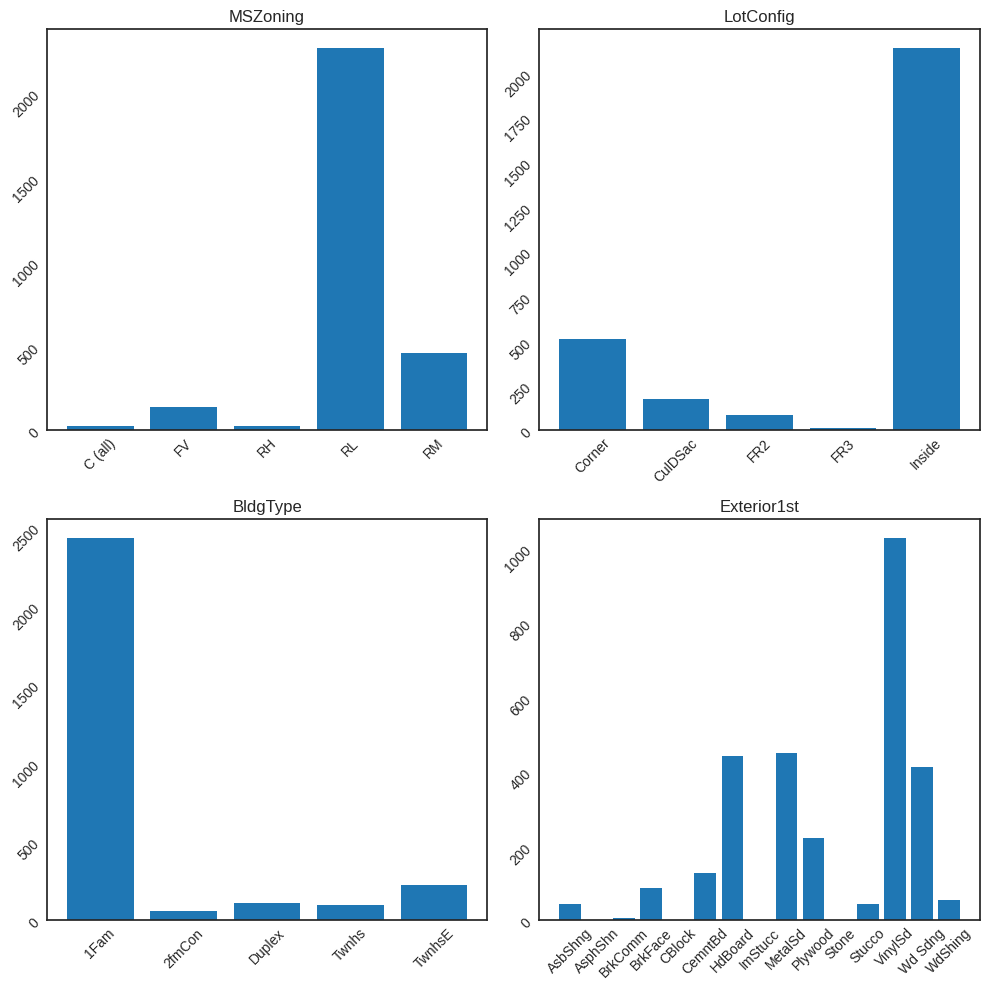

In [9]:

# First import the following two libs which are often for visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

num_fig_rows, num_fig_cols = 2,2

fig,ax = plt.subplots(num_fig_rows,num_fig_cols,figsize=(10,10))

for row in range(num_fig_rows):
    for col in range(num_fig_cols):
        non_numeric_col = non_numeric_df.columns[row*num_fig_cols + col]
        val_freg = non_numeric_df.groupby(non_numeric_col).size().to_dict()
        ax[row,col].bar(list(val_freg.keys()), list(val_freg.values()))
        ax[row,col].tick_params(labelrotation=45)
        ax[row,col].set_title(non_numeric_col)
fig.tight_layout()
plt.show()



In [15]:

numeric_df = df.select_dtypes(exclude=['object']).drop(columns=['Id'])


# 3. Modeling

In [10]:
#Let's check information if we have columns containing null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [11]:
df[df["SalePrice"].isnull()]

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
1460,1460,20,RH,11622,Inside,1Fam,6,1961,1961,VinylSd,144.0,882.0,NaN
1461,1461,20,RL,14267,Corner,1Fam,6,1958,1958,Wd Sdng,0.0,1329.0,NaN
1462,1462,60,RL,13830,Inside,1Fam,5,1997,1998,VinylSd,0.0,928.0,NaN
1463,1463,60,RL,9978,Inside,1Fam,6,1998,1998,VinylSd,0.0,926.0,NaN
1464,1464,120,RL,5005,Inside,TwnhsE,5,1992,1992,HdBoard,0.0,1280.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [29]:
clear_df = df[~df["SalePrice"].isnull()]

In [32]:
from sklearn.model_selection import train_test_split

# Let's separate into train and test set
# Remember to set the seed (random_state for this sklearn function)
# Let's separate X (independent variables) from y (dependent variable, i.e., SalePrice)

X = clear_df.drop(columns=['SalePrice'])
y = clear_df['SalePrice']

# Do train_test_split twice:

X_train , X_val_test , y_train , y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val , X_test , y_val , y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# print("X_train: ", X_train)
print("y_train: ", y_train)



y_train:  254     145000.0
1066    178000.0
638      85000.0
799     175000.0
380     127000.0
          ...   
1095    176432.0
1130    135000.0
1294    115000.0
860     189950.0
1126    174000.0
Name: SalePrice, Length: 1168, dtype: float64


# 3. Training Model

In [16]:
print(non_numeric_df.dtypes)

MSZoning       object
LotConfig      object
BldgType       object
Exterior1st    object
dtype: object


In [17]:
print(numeric_df.dtypes)

MSSubClass        int64
LotArea           int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object


In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

numeric_features = numeric_df.drop(columns=['SalePrice']).columns

numeric_transformer = Pipeline(
    # steps=[(("imputer", SimpleImputer(strategy="mean")),("scaler",StandardScaler()))]
    steps=[("imputer", SimpleImputer(strategy="mean")),("scaler",StandardScaler())]
)

category_features = non_numeric_df.columns
categorical_transformer = Pipeline(
    steps=[("encode", OneHotEncoder(handle_unknown="ignore"))]
)


preprocessor = ColumnTransformer(
    transformers= [
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, category_features)
    ]
)



In [38]:
clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor), ("regressor", LinearRegression())
    ]
)

clf.fit(X_train, y_train)
print("*"*50)
print("Model score on training data: %.3f" % clf.score(X_train, y_train))
print("Model score on validation data: %.3f" % clf.score(X_val, y_val))


**************************************************
Model score on training data: 0.614
Model score on validation data: 0.678


In [41]:
# Now, let's try with LightGBM and XGBoost
import lightgbm as lgb

hyper_params = {
    'task' : 'train',
    'boosting_type' : 'gbdt',
    'objective' : 'regression',
    'metric' : 'l2',
    'verbose' : 1,
    'max_depth' : 4,
    'num_leaves' : 16,
} #  nhung tham so ma khong duoc hoc trong qua trinh training

clf = Pipeline(
    steps= [
        ('preprocessor', preprocessor), ("lightgbm", lgb.LGBMRegressor(**hyper_params))
    ]
)

clf.fit(X_train, y_train)

print("*"*50)
print("Model score on training data: %.3f" % clf.score(X_train, y_train))
print("Model score on validation data: %.3f" % clf.score(X_val, y_val))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 27
[LightGBM] [Info] Start training from score 181441.541952
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [ ]:
print(pd.DataFrame(X_test.iloc[:1]))

In [43]:
clf.score(X_test, y_test)


#Get a prediction

print("House Attributes: ",X_test.iloc[:1].to_dict())
print(f"Predicted House Price: {clf.predict(pd.DataFrame(X_test.iloc[:1]))[0]}")
print("Ground Truth: ", y_test.iloc[0])

House Attributes:  {'Id': {416: 416}, 'MSSubClass': {416: 60}, 'MSZoning': {416: 'RL'}, 'LotArea': {416: 7844}, 'LotConfig': {416: 'Inside'}, 'BldgType': {416: '1Fam'}, 'OverallCond': {416: 7}, 'YearBuilt': {416: 1978}, 'YearRemodAdd': {416: 1978}, 'Exterior1st': {416: 'HdBoard'}, 'BsmtFinSF2': {416: 0.0}, 'TotalBsmtSF': {416: 672.0}}
Predicted House Price: 157551.3761237591
Ground Truth:  149500.0
